In [39]:
import pandas as pd
import seaborn as sb
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [2]:
yel2019 = pd.read_csv("/Users/james.fung/Desktop/test_scripts/via/yellow_tripdata_2019-01.csv")

In [3]:
zones = pd.read_csv("/Users/james.fung/Desktop/test_scripts/via/taxi_zones.csv")

In [4]:
yel2019.head(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.5,1,N,151,239,1,7.0,0.5,0.5,1.65,0.00,0.3,9.95,NaN
1,1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.6,1,N,239,246,1,14.0,0.5,0.5,1.00,0.00,0.3,16.30,NaN
2,2,2018-12-21 13:48:30,2018-12-21 13:52:40,3,0.0,1,N,236,236,1,4.5,0.5,0.5,0.00,0.00,0.3,5.80,NaN
3,2,2018-11-28 15:52:25,2018-11-28 15:55:45,5,0.0,1,N,193,193,2,3.5,0.5,0.5,0.00,0.00,0.3,7.55,NaN
4,2,2018-11-28 15:56:57,2018-11-28 15:58:33,5,0.0,2,N,193,193,2,52.0,0.0,0.5,0.00,0.00,0.3,55.55,NaN
5,2,2018-11-28 16:25:49,2018-11-28 16:28:26,5,0.0,1,N,193,193,2,3.5,0.5,0.5,0.00,5.76,0.3,13.31,NaN
6,2,2018-11-28 16:29:37,2018-11-28 16:33:43,5,0.0,2,N,193,193,2,52.0,0.0,0.5,0.00,0.00,0.3,55.55,NaN
7,1,2019-01-01 00:21:28,2019-01-01 00:28:37,1,1.3,1,N,163,229,1,6.5,0.5,0.5,1.25,0.00,0.3,9.05,NaN
8,1,2019-01-01 00:32:01,2019-01-01 00:45:39,1,3.7,1,N,229,7,1,13.5,0.5,0.5,3.70,0.00,0.3,18.50,NaN
9,1,2019-01-01 00:57:32,2019-01-01 01:09:32,2,2.1,1,N,141,234,1,10.0,0.5,0.5,1.70,0.00,0.3,13.00,NaN


In [5]:
yel2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7667792 entries, 0 to 7667791
Data columns (total 18 columns):
VendorID                 int64
tpep_pickup_datetime     object
tpep_dropoff_datetime    object
passenger_count          int64
trip_distance            float64
RatecodeID               int64
store_and_fwd_flag       object
PULocationID             int64
DOLocationID             int64
payment_type             int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
dtypes: float64(9), int64(6), object(3)
memory usage: 1.0+ GB


### Preliminary Feature Extraction

Let's first extract some useful information from tpep_pickup_datetime. Things such as day of the week, day of month, month, and trip duration.

In [6]:
#Create a column for the clean date.
yel2019['clean_pickup_datetime'] = pd.to_datetime(yel2019['tpep_pickup_datetime'], format= '%Y-%m-%d %H:%M:%S')
yel2019['clean_dropoff_datetime'] = pd.to_datetime(yel2019['tpep_dropoff_datetime'], format= '%Y-%m-%d %H:%M:%S')

In [7]:
#Extract day of the week, day of month, and month.
pickup = yel2019['clean_pickup_datetime']
dropoff = yel2019['clean_dropoff_datetime']
yel2019['month'] = pickup.dt.month
yel2019['dom'] = pickup.dt.day
yel2019['dow'] = pickup.dt.dayofweek

In [8]:
#Extract the duration of the trip.
yel2019['diff_sec'] = (dropoff-pickup)/np.timedelta64(1,'s')

In [9]:
#Drop the unecessary columns.
yel2019 = yel2019.drop(['tpep_pickup_datetime','tpep_dropoff_datetime'],axis=1)

In [10]:
yel2019.head(10)

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,...,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,clean_pickup_datetime,clean_dropoff_datetime,month,dom,dow,diff_sec
0,1,1,1.5,1,N,151,239,1,7.0,0.5,...,0.00,0.3,9.95,NaN,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1,1,400.0
1,1,1,2.6,1,N,239,246,1,14.0,0.5,...,0.00,0.3,16.30,NaN,2019-01-01 00:59:47,2019-01-01 01:18:59,1,1,1,1152.0
2,2,3,0.0,1,N,236,236,1,4.5,0.5,...,0.00,0.3,5.80,NaN,2018-12-21 13:48:30,2018-12-21 13:52:40,12,21,4,250.0
3,2,5,0.0,1,N,193,193,2,3.5,0.5,...,0.00,0.3,7.55,NaN,2018-11-28 15:52:25,2018-11-28 15:55:45,11,28,2,200.0
4,2,5,0.0,2,N,193,193,2,52.0,0.0,...,0.00,0.3,55.55,NaN,2018-11-28 15:56:57,2018-11-28 15:58:33,11,28,2,96.0
5,2,5,0.0,1,N,193,193,2,3.5,0.5,...,5.76,0.3,13.31,NaN,2018-11-28 16:25:49,2018-11-28 16:28:26,11,28,2,157.0
6,2,5,0.0,2,N,193,193,2,52.0,0.0,...,0.00,0.3,55.55,NaN,2018-11-28 16:29:37,2018-11-28 16:33:43,11,28,2,246.0
7,1,1,1.3,1,N,163,229,1,6.5,0.5,...,0.00,0.3,9.05,NaN,2019-01-01 00:21:28,2019-01-01 00:28:37,1,1,1,429.0
8,1,1,3.7,1,N,229,7,1,13.5,0.5,...,0.00,0.3,18.50,NaN,2019-01-01 00:32:01,2019-01-01 00:45:39,1,1,1,818.0
9,1,2,2.1,1,N,141,234,1,10.0,0.5,...,0.00,0.3,13.00,NaN,2019-01-01 00:57:32,2019-01-01 01:09:32,1,1,1,720.0


### Taxi Zone Merge

We are particularly interested in the zone they were picked up in. Let's merge in the data from the zone dataset.

In [11]:
zones.head(5)

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone


In [12]:
zones_pu = zones.drop(['Borough','service_zone'],axis=1)
zones_pu.columns = ['PULocationID','PUZone']
zones_do = zones.drop(['Borough','service_zone'],axis=1)
zones_do.columns = ['DOLocationID','DOZone']

In [13]:
taxi_merged = pd.merge(
    pd.merge(yel2019, zones_pu, how='left',on='PULocationID'),
    zones_do, how='left', on = 'DOLocationID')

In [14]:
taxi_merged.head(10)

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,...,total_amount,congestion_surcharge,clean_pickup_datetime,clean_dropoff_datetime,month,dom,dow,diff_sec,PUZone,DOZone
0,1,1,1.5,1,N,151,239,1,7.0,0.5,...,9.95,NaN,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1,1,400.0,Manhattan Valley,Upper West Side South
1,1,1,2.6,1,N,239,246,1,14.0,0.5,...,16.30,NaN,2019-01-01 00:59:47,2019-01-01 01:18:59,1,1,1,1152.0,Upper West Side South,West Chelsea/Hudson Yards
2,2,3,0.0,1,N,236,236,1,4.5,0.5,...,5.80,NaN,2018-12-21 13:48:30,2018-12-21 13:52:40,12,21,4,250.0,Upper East Side North,Upper East Side North
3,2,5,0.0,1,N,193,193,2,3.5,0.5,...,7.55,NaN,2018-11-28 15:52:25,2018-11-28 15:55:45,11,28,2,200.0,Queensbridge/Ravenswood,Queensbridge/Ravenswood
4,2,5,0.0,2,N,193,193,2,52.0,0.0,...,55.55,NaN,2018-11-28 15:56:57,2018-11-28 15:58:33,11,28,2,96.0,Queensbridge/Ravenswood,Queensbridge/Ravenswood
5,2,5,0.0,1,N,193,193,2,3.5,0.5,...,13.31,NaN,2018-11-28 16:25:49,2018-11-28 16:28:26,11,28,2,157.0,Queensbridge/Ravenswood,Queensbridge/Ravenswood
6,2,5,0.0,2,N,193,193,2,52.0,0.0,...,55.55,NaN,2018-11-28 16:29:37,2018-11-28 16:33:43,11,28,2,246.0,Queensbridge/Ravenswood,Queensbridge/Ravenswood
7,1,1,1.3,1,N,163,229,1,6.5,0.5,...,9.05,NaN,2019-01-01 00:21:28,2019-01-01 00:28:37,1,1,1,429.0,Midtown North,Sutton Place/Turtle Bay North
8,1,1,3.7,1,N,229,7,1,13.5,0.5,...,18.50,NaN,2019-01-01 00:32:01,2019-01-01 00:45:39,1,1,1,818.0,Sutton Place/Turtle Bay North,Astoria
9,1,2,2.1,1,N,141,234,1,10.0,0.5,...,13.00,NaN,2019-01-01 00:57:32,2019-01-01 01:09:32,1,1,1,720.0,Lenox Hill West,Union Sq


In [15]:
taxi_merged.columns

Index(['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID',
       'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type',
       'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount', 'congestion_surcharge',
       'clean_pickup_datetime', 'clean_dropoff_datetime', 'month', 'dom',
       'dow', 'diff_sec', 'PUZone', 'DOZone'],
      dtype='object')

### Preliminary Data Cleaning

In [16]:
#Drop some unecesssary columns.
taxi_merged = taxi_merged.drop(['VendorID',
                                'PULocationID',
                                'DOLocationID',
                                'clean_pickup_datetime',
                                'clean_dropoff_datetime'],axis=1)

In [17]:
#Convert some columns into factors.
factors = ['RatecodeID','payment_type','month','dom','dow']
for i in factors:
    taxi_merged[i] = taxi_merged[i].astype(object)

In [18]:
#Check out the numerical columns.
pd.options.display.float_format = "{:.2f}".format
taxi_merged.describe()

,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,diff_sec
count,7667792.00,7667792.00,7667792.00,7667792.00,7667792.00,7667792.00,7667792.00,7667792.00,7667792.00,2811814.00,7667792.00
mean,1.57,2.80,12.41,0.33,0.50,1.83,0.32,0.30,15.68,0.00,988.87
std,1.22,3.74,262.07,0.51,0.05,2.50,2.02,0.02,262.29,0.01,4908.90
min,0.00,0.00,-362.00,-60.00,-0.50,-63.50,-70.00,-0.30,-362.80,0.00,-5056830.00
25%,1.00,0.90,6.00,0.00,0.50,0.00,0.00,0.30,8.19,0.00,366.00
50%,1.00,1.53,8.50,0.00,0.50,1.43,0.00,0.30,11.27,0.00,609.00
75%,2.00,2.80,13.50,0.50,0.50,2.33,0.00,0.30,16.56,0.00,994.00
max,9.00,831.80,623259.86,535.38,60.80,787.25,3288.00,0.60,623261.66,2.50,2618881.00


There are some oddities in this data. Let's do some cleanup.

In [19]:
taxi_merged = taxi_merged[taxi_merged['month']==1]
taxi_merged = taxi_merged[taxi_merged['passenger_count']>0]
taxi_merged = taxi_merged[taxi_merged['fare_amount']>0]
taxi_merged = taxi_merged[taxi_merged['tip_amount']>=0]
taxi_merged = taxi_merged[taxi_merged['diff_sec']>0]

In [20]:
taxi_merged.describe()

,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,diff_sec
count,7534754.00,7534754.00,7534754.00,7534754.00,7534754.00,7534754.00,7534754.00,7534754.00,7534754.00,2761124.00,7534754.00
mean,1.59,2.81,12.34,0.33,0.50,1.83,0.32,0.30,15.62,0.00,994.03
std,1.22,3.74,227.36,0.47,0.04,2.50,2.03,0.00,227.51,0.01,4545.40
min,1.00,0.00,0.01,-60.00,0.00,0.00,0.00,0.00,0.31,0.00,1.00
25%,1.00,0.90,6.00,0.00,0.50,0.00,0.00,0.30,8.30,0.00,367.00
50%,1.00,1.53,9.00,0.00,0.50,1.45,0.00,0.30,11.30,0.00,610.00
75%,2.00,2.80,13.50,0.50,0.50,2.34,0.00,0.30,16.56,0.00,995.00
max,9.00,831.80,623259.86,18.50,60.80,787.25,3288.00,0.60,623261.66,2.50,2618881.00


Looks a lot better except for the extreme outliers. Let's remove all rows that are greater than the 99th percentile.

In [26]:
#This is lazy coding - sorry!
numerical_cols = taxi_merged.describe().columns
for cols in numerical_cols:
    taxi_merged = taxi_merged[taxi_merged[cols]<=taxi_merged[cols].quantile(q=.99)]

In [27]:
taxi_merged.describe()

,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,diff_sec
count,2636619.00,2636619.00,2636619.00,2636619.00,2636619.00,2636619.00,2636619.00,2636619.00,2636619.00,2636619.00,2636619.00
mean,1.58,2.21,10.57,0.33,0.50,1.62,0.14,0.30,13.46,0.00,716.30
std,1.21,2.27,6.72,0.39,0.02,1.62,0.89,0.00,8.14,0.00,466.75
min,1.00,0.00,0.01,-0.50,0.00,0.00,0.00,0.00,0.31,0.00,1.00
25%,1.00,0.90,6.00,0.00,0.50,0.00,0.00,0.30,8.16,0.00,366.00
50%,1.00,1.46,8.50,0.00,0.50,1.45,0.00,0.30,11.16,0.00,602.00
75%,2.00,2.52,12.50,0.50,0.50,2.26,0.00,0.30,15.80,0.00,956.00
max,6.00,18.90,52.00,1.00,0.50,10.52,5.76,0.30,52.80,0.00,2553.00


### Preliminary EDA

In [32]:
taxi_merged.head(5)

,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,month,dom,dow,diff_sec,PUZone,DOZone
579459,1,0.60,1,N,1,4.00,0.00,0.50,1.50,0.00,0.30,6.30,0.00,1,3,3,121.00,Yorkville West,Lenox Hill West
579460,1,2.20,1,N,1,10.00,0.00,0.50,1.00,0.00,0.30,11.80,0.00,1,3,3,590.00,Yorkville West,Manhattan Valley
592224,1,2.50,1,N,1,11.00,0.00,0.50,2.35,0.00,0.30,14.15,0.00,1,3,3,695.00,Upper West Side North,West Chelsea/Hudson Yards
872659,1,0.40,1,N,1,3.50,0.50,0.50,0.00,0.00,0.30,4.80,0.00,1,5,5,135.00,South Williamsburg,South Williamsburg
872660,1,1.90,1,N,1,9.00,0.50,0.50,2.05,0.00,0.30,12.35,0.00,1,5,5,606.00,Lower East Side,World Trade Center


#### Goal: Propose a metric or algorithm to assess the potential efficiency of aggregating inefficient rides into one.

One of the first thoughts that comes to mind are single unit passengers who hail a taxi in the same time and same location of another single unit passenger.

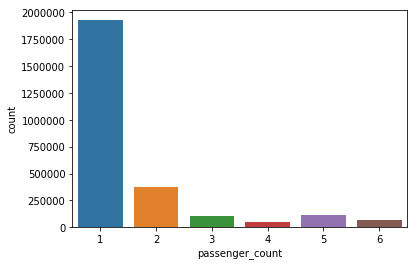

In [31]:
#What is the distribution of passenger counts?
sb.countplot(taxi_merged['passenger_count'])

A majority of taxi rides are single passenger rides.

Let's create an indicator of if someone departed from the same PUZone 

In [50]:
taxi_merged['PUZone'].value_counts()/len(taxi_merged)*100

Upper East Side South                           4.68
Upper East Side North                           4.51
Midtown Center                                  4.33
Midtown East                                    3.92
Penn Station/Madison Sq West                    3.57
Times Sq/Theatre District                       3.41
Murray Hill                                     3.27
Union Sq                                        3.26
Lincoln Square East                             3.19
Clinton East                                    3.18
Upper West Side South                           2.76
Midtown North                                   2.71
Lenox Hill West                                 2.57
East Village                                    2.39
Gramercy                                        2.35
Midtown South                                   2.30
East Chelsea                                    2.27
Upper West Side North                           2.21
NV                                            

In [51]:
taxi_merged['PUZone'] == ['Upper East Side North','Upper East Side South']

ValueError: Arrays were different lengths: 2636619 vs 2